In [76]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import sys
import copy
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 
from zipfile import ZipFile 
import sklearn
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 
import PIL.Image as Image
import cv2
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



 
 

In [77]:
data = pd.read_csv('sonar_dataset.csv')
x = data['0.0200']
y = data['0.0090']
x  =x*10000
y   =y*10000
data =data.drop(data.columns,axis=1)
data['a'] = x
data['b'] = y
data.head()

,a,b
0,453.0,52.0
1,262.0,95.0
2,100.0,40.0
3,762.0,107.0
4,286.0,51.0


(array([ 4.,  6., 16., 15., 15., 11., 19., 21., 10., 13., 12., 10.,  6.,
         8.,  5.,  5.,  4.,  1.,  5.,  0.,  0.,  2.,  2.,  2.,  0.,  3.,
         2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  15.  ,   42.12,   69.24,   96.36,  123.48,  150.6 ,  177.72,
         204.84,  231.96,  259.08,  286.2 ,  313.32,  340.44,  367.56,
         394.68,  421.8 ,  448.92,  476.04,  503.16,  530.28,  557.4 ,
         584.52,  611.64,  638.76,  665.88,  693.  ,  720.12,  747.24,
         774.36,  801.48,  828.6 ,  855.72,  882.84,  909.96,  937.08,
         964.2 ,  991.32, 1018.44, 1045.56, 1072.68, 1099.8 , 1126.92,
        1154.04, 1181.16, 1208.28, 1235.4 , 1262.52, 1289.64, 1316.76,
        1343.88, 1371.  ]),
 <BarContainer object of 50 artists>)

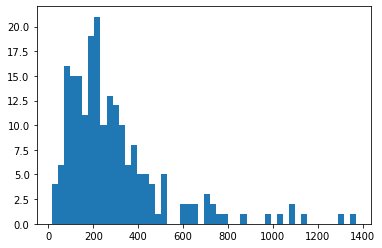

In [78]:
 plt.hist(data.a , bins =50   )

(207, 2)
(192, 2)


(array([ 2.,  2.,  2.,  2.,  5.,  6., 11.,  8., 13.,  5.,  3.,  6.,  5.,
         8., 14.,  8., 10.,  3.,  7.,  8.,  2.,  6.,  6.,  3.,  6.,  3.,
         3.,  6.,  1.,  2.,  5.,  3.,  2.,  2.,  1.,  1.,  1.,  0.,  2.,
         3.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  2.]),
 array([ 15.  ,  27.98,  40.96,  53.94,  66.92,  79.9 ,  92.88, 105.86,
        118.84, 131.82, 144.8 , 157.78, 170.76, 183.74, 196.72, 209.7 ,
        222.68, 235.66, 248.64, 261.62, 274.6 , 287.58, 300.56, 313.54,
        326.52, 339.5 , 352.48, 365.46, 378.44, 391.42, 404.4 , 417.38,
        430.36, 443.34, 456.32, 469.3 , 482.28, 495.26, 508.24, 521.22,
        534.2 , 547.18, 560.16, 573.14, 586.12, 599.1 , 612.08, 625.06,
        638.04, 651.02, 664.  ]),
 <BarContainer object of 50 artists>)

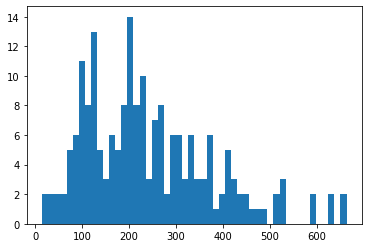

In [79]:
#  outlier detection  with IQR technique

iqr = data.a.quantile(.75)-data.a.quantile(.25)
maxi   = data.a.quantile(.75)+(1.5)*iqr
mini   = data.a.quantile(.25)-(1.5)*iqr


print(data.shape)
x = data[(data.a>mini) &( data.a<maxi)]
print(x.shape)

plt.hist(x.a , bins =50 )

